In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Acropolis'

link = 'https://rally-base.com/2023/eko-acropolis-rally-2023/?ssId='
startat, no_ss=7824, int(6) # starting number of url, count of Special Stages
canceled = []

stages = [number for number in range(no_ss)]


rally_23 = []

In [3]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [2]:
for ss in stages:
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(ss, val, ss_a, "\n", my_url11)
    
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[1]
   
    data.columns = data.iloc[0]
    data = data[1:]
    data['ss']=ss+1
    #print(data.columns)
    
    equal = '-' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('-', method='ffill')
    
    #data.to_csv('05_rally23_SS'+str(ss+1)+'.csv', index=False)

    rally_23.append(data)

In [3]:
rally2023_stages = pd.concat(rally_23, axis=0)
#rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(str).astype(int)
rally2023_stages['No.'] = rally2023_stages['No.'].astype(str).astype(int)
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:10]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No.,Crew,Group,SS time,Aver. speed sec/km,Diff.Leader Diff.Prev.,ss,Race,cou
1,1,69,Rovanperä,RC1,00:01:32.9,57.35 0.00,00:00:00.0 00:00:00.0,1,Acropolis,1
2,2,4,Lappi Esa,RC1,00:01:33.2,57.17 0.20,00:00:00.3 00:00:00.3,1,Acropolis,2
3,3,11,Neuville,RC1,00:01:33.3,57.11 0.27,00:00:00.4 00:00:00.1,1,Acropolis,3
4,4,6,Sordo Dan,RC1,00:01:33.4,57.04 0.34,00:00:00.5 00:00:00.1,1,Acropolis,4
5,5,8,Tänak Ott,RC1,00:01:33.6,56.92 0.47,00:00:00.7 00:00:00.2,1,Acropolis,5
...,...,...,...,...,...,...,...,...,...,...
62,62,60,Creighton,RC3,00:30:14.5,56.19 25.89,00:12:13.1 00:01:12.7,6,Acropolis,62
63,63,78,Papageorgi,RC4,00:31:01.1,54.78 27.53,00:12:59.7 00:00:46.6,6,Acropolis,63
64,64,82,Kanellopou,RC4,00:31:22.1,54.17 28.27,00:13:20.7 00:00:21.0,6,Acropolis,64
65,65,56,Delaportas,RC3,00:31:29.2,53.97 28.52,00:13:27.8 00:00:07.1,6,Acropolis,65


In [4]:
rally2023_stageClass=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'SS time', 'cou'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'Pos.', 'cou'], axis=1)
rally2023_ClassView = rally2023_stageClass.set_index(['No.', 'Crew','Group','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['No.', 'Crew','Group', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
rally2023_ClassView2 = rally2023_stageClass2.set_index(['No.','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView2 = rally2023_ClassView2.fillna("-")


In [5]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv',index=False)

In [6]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView2, (str(rallyname) + '_Stages_Classification.png'))


In [7]:
rally2023_ClassView

0                              Pos.                    
ss                                1   2   3   4   5   6
No. Crew       Group Race                              
4   Lappi  Esa RC1   Acropolis    2   7   6   3   4   7
6   Sordo  Dan RC1   Acropolis    4   6   8   6   5   8
7   Loubet  P. RC1   Acropolis    8  67  65  65   -   -
8   Tänak  Ott RC1   Acropolis    5   3   4   3   1   1
9   Serderidis RC1   Acropolis   32  26  31   9  28  35
...                             ...  ..  ..  ..  ..  ..
81  Panteli  C RC4   Acropolis   65  57  54  10  52  49
82  Kanellopou RC4   Acropolis   68  64  64  10  59  64
83  Šekuljica  RC5   Acropolis   60  62  63  10  56  58
84  Parellis   RC5   Acropolis   62  60  61  10  55  55
85  Kaltsounis RC4   Acropolis   67  65  68  66  67  66

[69 rows x 6 columns]

In [8]:
rally2023_stages[['time_hh', 'time_mm','time_ss']] = rally2023_stages['SS time'].str.split(':', expand=True)
rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_hh']*3600 + rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'SS time', 'Aver. speed sec/km',  'Diff.Leader Diff.Prev.', 'time_hh', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,No.,Crew,Group,ss,Race,cou,time_SS_sec
1,69,Rovanperä,RC1,1,Acropolis,1,92.9
2,4,Lappi Esa,RC1,1,Acropolis,2,93.2
3,11,Neuville,RC1,1,Acropolis,3,93.3
4,6,Sordo Dan,RC1,1,Acropolis,4,93.4
5,8,Tänak Ott,RC1,1,Acropolis,5,93.6
...,...,...,...,...,...,...,...
62,60,Creighton,RC3,6,Acropolis,62,1814.5
63,78,Papageorgi,RC4,6,Acropolis,63,1861.1
64,82,Kanellopou,RC4,6,Acropolis,64,1882.1
65,56,Delaportas,RC3,6,Acropolis,65,1889.2


In [9]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
min_value_G = rally2023_stages.groupby(['Race', 'ss', 'Group'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)
min_value2_G =  pd.DataFrame(min_value_G)

min_value2_G = min_value2_G.rename(columns={'time_SS_sec' : 'min_time_Gr'})
min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2_G

min_time_Gr
Race      ss Group             
Acropolis 1  RC1           92.9
             RC2           95.0
             RC3          101.7
             RC4          109.7
             RC5          115.5
          2  RC1          334.4
             RC2          358.4
             RC3          386.7
             RC4          424.9
             RC5          470.4
          3  RC1          676.8
             RC2          719.0
             RC3          769.8
             RC4          856.5
             RC5          959.9
          4  RC1          332.1
             RC2          375.6
             RC3          375.6
             RC4          375.6
             RC5          375.6
          5  RC1          771.7
             RC2          811.8
             RC3          872.7
             RC4          940.5
             RC5         1079.5
          6  RC1         1081.4
             RC2         1141.8
             RC3         1214.5
             RC4         1327.7
             RC5         1476.1

In [10]:
ss_times_F_G = rally2023_stages.merge(min_value2_G, on=['Race', 'ss', 'Group'])
ss_times_F = ss_times_F_G.merge(min_value2, on=['Race', 'ss'])
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time_Gr,min_time
0,69,Rovanperä,RC1,1,Acropolis,1,92.9,92.9,92.9
1,4,Lappi Esa,RC1,1,Acropolis,2,93.2,92.9,92.9
2,11,Neuville,RC1,1,Acropolis,3,93.3,92.9,92.9
3,6,Sordo Dan,RC1,1,Acropolis,4,93.4,92.9,92.9
4,8,Tänak Ott,RC1,1,Acropolis,5,93.6,92.9,92.9
...,...,...,...,...,...,...,...,...,...
403,78,Papageorgi,RC4,6,Acropolis,63,1861.1,1327.7,1081.4
404,82,Kanellopou,RC4,6,Acropolis,64,1882.1,1327.7,1081.4
405,85,Kaltsounis,RC4,6,Acropolis,66,1927.7,1327.7,1081.4
406,84,Parellis,RC5,6,Acropolis,55,1476.1,1476.1,1081.4


In [11]:
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F['diff_Gr']=ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr']
ss_times_F['diff_Gr%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr'])/ss_times_F['min_time_Gr']*100
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time_Gr,min_time,diff,diff%,SS.,diff_Gr,diff_Gr%
0,69,Rovanperä,RC1,1,Acropolis,1,92.9,92.9,92.9,0.0,0.000000,01,0.0,0.000000
1,4,Lappi Esa,RC1,1,Acropolis,2,93.2,92.9,92.9,0.3,0.322928,01,0.3,0.322928
2,11,Neuville,RC1,1,Acropolis,3,93.3,92.9,92.9,0.4,0.430571,01,0.4,0.430571
3,6,Sordo Dan,RC1,1,Acropolis,4,93.4,92.9,92.9,0.5,0.538213,01,0.5,0.538213
4,8,Tänak Ott,RC1,1,Acropolis,5,93.6,92.9,92.9,0.7,0.753498,01,0.7,0.753498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,78,Papageorgi,RC4,6,Acropolis,63,1861.1,1327.7,1081.4,779.7,72.100980,06,533.4,40.174738
404,82,Kanellopou,RC4,6,Acropolis,64,1882.1,1327.7,1081.4,800.7,74.042907,06,554.4,41.756421
405,85,Kaltsounis,RC4,6,Acropolis,66,1927.7,1327.7,1081.4,846.3,78.259663,06,600.0,45.190932
406,84,Parellis,RC5,6,Acropolis,55,1476.1,1476.1,1081.4,394.7,36.498983,06,0.0,0.000000


In [28]:
Group = 'RC4'
ss_times_WRC = ss_times_F[ss_times_F['Group'].str.contains(Group)]
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time_Gr,min_time,diff,diff%,SS.,diff_Gr,diff_Gr%
58,79,Fontana M,RC4,1,Acropolis,51,109.7,109.7,92.9,16.8,18.083961,01,0.0,0.000000
59,77,Plagos Io,RC4,1,Acropolis,52,110.2,109.7,92.9,17.3,18.622174,01,0.5,0.455789
60,76,Chatzimark,RC4,1,Acropolis,54,110.4,109.7,92.9,17.5,18.837460,01,0.7,0.638104
61,75,Lefkaditis,RC4,1,Acropolis,58,113.1,109.7,92.9,20.2,21.743811,01,3.4,3.099362
62,80,Kalamaras,RC4,1,Acropolis,63,120.4,109.7,92.9,27.5,29.601722,01,10.7,9.753874
63,81,Panteli C,RC4,1,Acropolis,65,124.3,109.7,92.9,31.4,33.799785,01,14.6,13.309025
64,78,Papageorgi,RC4,1,Acropolis,66,148.8,109.7,92.9,55.9,60.172228,01,39.1,35.642662
65,85,Kaltsounis,RC4,1,Acropolis,67,154.5,109.7,92.9,61.6,66.307858,01,44.8,40.838651
66,82,Kanellopou,RC4,1,Acropolis,68,157.2,109.7,92.9,64.3,69.214209,01,47.5,43.299909
127,76,Chatzimark,RC4,2,Acropolis,50,424.9,424.9,334.4,90.5,27.063397,02,0.0,0.000000


In [29]:
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time_Gr,min_time,diff,diff%,SS.,diff_Gr,diff_Gr%
58,79,Fontana M,RC4,1,Acropolis,51,109.7,109.7,92.9,16.8,18.083961,01,0.0,0.000000
59,77,Plagos Io,RC4,1,Acropolis,52,110.2,109.7,92.9,17.3,18.622174,01,0.5,0.455789
60,76,Chatzimark,RC4,1,Acropolis,54,110.4,109.7,92.9,17.5,18.837460,01,0.7,0.638104
61,75,Lefkaditis,RC4,1,Acropolis,58,113.1,109.7,92.9,20.2,21.743811,01,3.4,3.099362
62,80,Kalamaras,RC4,1,Acropolis,63,120.4,109.7,92.9,27.5,29.601722,01,10.7,9.753874
63,81,Panteli C,RC4,1,Acropolis,65,124.3,109.7,92.9,31.4,33.799785,01,14.6,13.309025
64,78,Papageorgi,RC4,1,Acropolis,66,148.8,109.7,92.9,55.9,60.172228,01,39.1,35.642662
65,85,Kaltsounis,RC4,1,Acropolis,67,154.5,109.7,92.9,61.6,66.307858,01,44.8,40.838651
66,82,Kanellopou,RC4,1,Acropolis,68,157.2,109.7,92.9,64.3,69.214209,01,47.5,43.299909
127,76,Chatzimark,RC4,2,Acropolis,50,424.9,424.9,334.4,90.5,27.063397,02,0.0,0.000000


In [30]:
ss_times_F3 =ss_times_WRC.drop(['Group','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_Gr', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race       Acropolis                                   
SS.               01     02     03     04     05     06
Crew                                                   
Chatzimark       0.7    0.0    0.0    0.0   10.2   21.6
Fontana  M       0.0    1.8   87.2    0.0    0.0    0.0
Kalamaras       10.7   56.2   87.0    0.0   95.2  168.6
Kaltsounis      44.8  114.9  600.0  600.0  600.0  600.0
Kanellopou      47.5  112.7  239.0    0.0  313.4  554.4
Lefkaditis       3.4    7.5   36.6    0.0   29.2    4.0
Panteli  C      14.6   21.9   32.8    0.0   76.1   56.2
Papageorgi      39.1  108.0  198.4    0.0  561.3  533.4
Plagos  Io       0.5   10.6   43.0    0.0  301.3  139.8

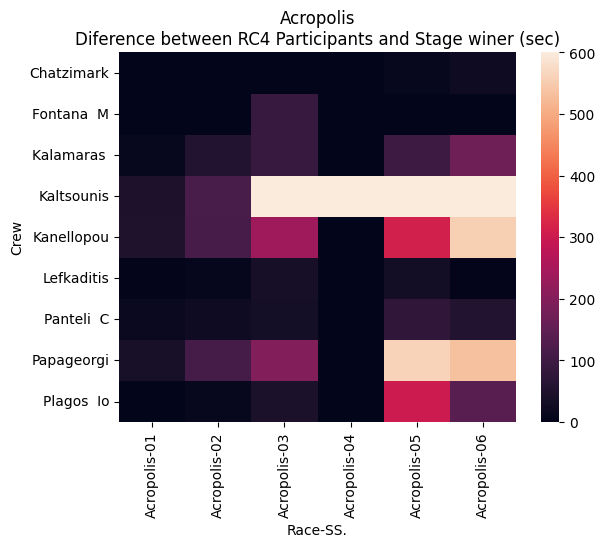

In [31]:
Heatmap_ALL = sns.heatmap(ss_times_F4)
plt.title(rallyname+'\nDiference between '+ Group + ' Participants and Stage winer (sec)')
plt.savefig("Heatmap_" + Group + ".png")

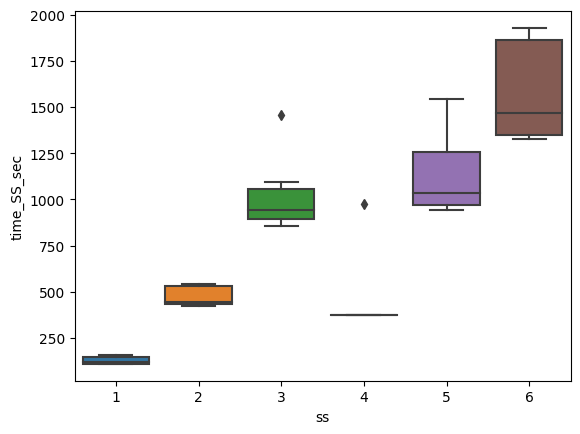

In [32]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])
plt.savefig("Boxplot_" + Group + ".png")

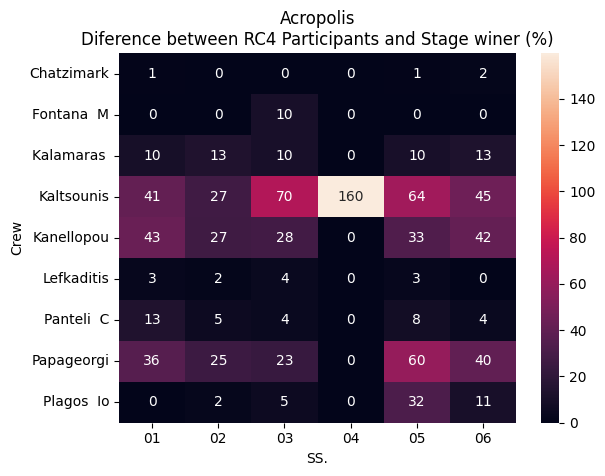

In [33]:
ss_timesa = pd.pivot_table(ss_times_WRC, values='diff_Gr%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f')
plt.title(rallyname +'\nDiference between ' + Group + ' Participants and Stage winer (%)')
plt.savefig( Group + ".jpg")